# Template
- 1. EDA
- 2. 전처리
- 3. 데이터 분할
- 4. 학습
- 5. hyper-parameter tuning
- 6. 최종 테스트 

## Load Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
base_path = 'new_file/'
samsung_new = pd.read_csv(base_path + 'samsung_new.csv')
celltrion_new = pd.read_csv(base_path + 'celltrion_new.csv')
kakao_new = pd.read_csv(base_path + 'kakao_new.csv')
naver_new = pd.read_csv(base_path + 'naver_new.csv')
skhynix_new = pd.read_csv(base_path + 'skhynix_new.csv')

In [4]:
# 필요한 row만 분리
def instract_new_files(file):
    file.columns = ['Date','G_Val','F_Val','F_total','F_percen']
    file = file.loc[3065:518:-1,:,]
    file.index = file['Date']
    file.drop(columns=['Date'],inplace=True)
    return file

samsung_new = instract_new_files(samsung_new)
celltrion_new = instract_new_files(celltrion_new)
kakao_new = instract_new_files(kakao_new)
naver_new = instract_new_files(naver_new)
skhynix_new = instract_new_files(skhynix_new)

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/1690788129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file.drop(columns=['Date'],inplace=True)
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/1690788129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file.drop(columns=['Date'],inplace=True)
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/1690788129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [5]:
# read train csv
train_path = 'train/'
kospi_train = pd.read_csv(train_path + 'kospi_train.csv') # kospi (2549)
celltrion_train = pd.read_csv(train_path + 'celltrion_train.csv') # celltrion (2548)
kakao_train = pd.read_csv(train_path + 'kakao_train.csv') # kakao (2548)
naver_train = pd.read_csv(train_path + 'naver_train.csv') # naver (2548)
samsung_train = pd.read_csv(train_path + 'samsung_train.csv') # samsung (2548)
skhynix_train = pd.read_csv(train_path + 'skhynix_train.csv') # skhynix (2548)
us_3MT_train = pd.read_csv(train_path + 'us_3MT_train.csv') # 미국채 3개월 금리 (3086)
us_2YT_train  = pd.read_csv(train_path + 'us_2YT_train.csv') # 미국채 2년 금리 (3070)
us_10YT_train = pd.read_csv(train_path + 'us_10YT_train.csv') # 미국채 10년 금리 (3013)
kr_10YT_train = pd.read_csv(train_path + 'kr_10YT_train.csv') # 한국채 10년 금리 (3062)
wti_train = pd.read_csv(train_path + 'wti_train.csv') # wti 유가 선물 (2598)
gas_train = pd.read_csv(train_path + 'gas_train.csv') # 천연 가스 선물 (2595)
gold_train = pd.read_csv(train_path + 'gold_train.csv') # 금 선물 (2544)
copper_train = pd.read_csv(train_path + 'copper_train.csv') # 구리 선물 (2538)
usd_index_train = pd.read_csv(train_path + 'usd_index_train.csv') # 달러 지수 선물 (2662)
usd_krw_train = pd.read_csv(train_path + 'usd_krw_train.csv') # 달러/원화 환율 (2694)
usd_jpy_train = pd.read_csv(train_path + 'usd_jpy_train.csv') # 달러/엔화 환율 (2694)
usd_cny_train = pd.read_csv(train_path + 'usd_cny_train.csv') # 달러/위안화 환율 (2694)
dow_train = pd.read_csv(train_path + 'dow_train.csv') # 다우 존스 지수 (2598)
snp_train = pd.read_csv(train_path + 'snp_train.csv') # snp 500 지수 (2598)
nasdaq_train = pd.read_csv(train_path + 'nasdaq_train.csv') # nasdaq 지수 (2598)
hk_train = pd.read_csv(train_path + 'hk_train.csv') # 항셍 지수 (2147)
csi_train = pd.read_csv(train_path + 'csi_train.csv') # csi300 지수 (2511)

In [6]:
# read test csv
test_path = 'test/'
kospi_test = pd.read_csv(test_path + 'kospi_test.csv') # kospi
celltrion_test = pd.read_csv(test_path + 'celltrion_test.csv') # celltrion
kakao_test = pd.read_csv(test_path + 'kakao_test.csv') # kakao
naver_test = pd.read_csv(test_path + 'naver_test.csv') # naver
samsung_test = pd.read_csv(test_path + 'samsung_test.csv') # samsung
skhynix_test = pd.read_csv(test_path + 'skhynix_test.csv') # skhynix
us_3MT_test = pd.read_csv(test_path + 'us_3MT_test.csv') # 미국채 3개월 금리
us_2YT_test  = pd.read_csv(test_path + 'us_2YT_test.csv') # 미국채 2년 금리
us_10YT_test = pd.read_csv(test_path + 'us_10YT_test.csv') # 미국채 10년 금리
kr_10YT_test = pd.read_csv(test_path + 'kr_10YT_test.csv') # 한국채 10년 금리
wti_test = pd.read_csv(test_path + 'wti_test.csv') # wti 유가 선물
gas_test = pd.read_csv(test_path + 'gas_test.csv') # 천연 가스 선물
gold_test = pd.read_csv(test_path + 'gold_test.csv') # 금 선물
copper_test = pd.read_csv(test_path + 'copper_test.csv') # 구리 선물
usd_index_test = pd.read_csv(test_path + 'usd_index_test.csv') # 달러 지수 선물
usd_krw_test = pd.read_csv(test_path + 'usd_krw_test.csv') # 달러/원화 환율
usd_jpy_test = pd.read_csv(test_path + 'usd_jpy_test.csv') # 달러/엔화 환율
usd_cny_test = pd.read_csv(test_path + 'usd_cny_test.csv') # 달러/위안화 환율
dow_test = pd.read_csv(test_path + 'dow_test.csv') # 다우 존스 지수
snp_test = pd.read_csv(test_path + 'snp_test.csv') # snp 500 지수
nasdaq_test = pd.read_csv(test_path + 'nasdaq_test.csv') # nasdaq 지수
hk_test = pd.read_csv(test_path + 'hk_test.csv') # 항셍 지수
csi_test = pd.read_csv(test_path + 'csi_test.csv') # csi300 지수

In [7]:
# Change type of 'Date' to 'datetime'
kospi_train.Date = pd.to_datetime(kospi_train.Date)
celltrion_train.Date = pd.to_datetime(celltrion_train.Date)
kakao_train.Date = pd.to_datetime(kakao_train.Date)
naver_train.Date = pd.to_datetime(naver_train.Date)
samsung_train.Date = pd.to_datetime(samsung_train.Date)
skhynix_train.Date = pd.to_datetime(skhynix_train.Date)
us_3MT_train.Date = pd.to_datetime(us_3MT_train.Date)
us_2YT_train .Date = pd.to_datetime(us_2YT_train .Date)
us_10YT_train.Date = pd.to_datetime(us_10YT_train.Date)
kr_10YT_train.Date = pd.to_datetime(kr_10YT_train.Date)
wti_train.Date = pd.to_datetime(wti_train.Date)
gas_train.Date = pd.to_datetime(gas_train.Date)
gold_train.Date = pd.to_datetime(gold_train.Date)
copper_train.Date = pd.to_datetime(copper_train.Date)
usd_index_train.Date = pd.to_datetime(usd_index_train.Date)
usd_krw_train.Date = pd.to_datetime(usd_krw_train.Date)
usd_jpy_train.Date = pd.to_datetime(usd_jpy_train.Date)
usd_cny_train.Date = pd.to_datetime(usd_cny_train.Date)
dow_train.Date = pd.to_datetime(dow_train.Date)
snp_train.Date = pd.to_datetime(snp_train.Date)
nasdaq_train.Date = pd.to_datetime(nasdaq_train.Date)
hk_train.Date = pd.to_datetime(hk_train.Date)
csi_train.Date = pd.to_datetime(csi_train.Date)
kospi_test.Date = pd.to_datetime(kospi_test.Date)
celltrion_test.Date = pd.to_datetime(celltrion_test.Date)
kakao_test.Date = pd.to_datetime(kakao_test.Date)
naver_test.Date = pd.to_datetime(naver_test.Date)
samsung_test.Date = pd.to_datetime(samsung_test.Date)
skhynix_test.Date = pd.to_datetime(skhynix_test.Date)
us_3MT_test.Date = pd.to_datetime(us_3MT_test.Date)
us_2YT_test .Date = pd.to_datetime(us_2YT_test .Date)
us_10YT_test.Date = pd.to_datetime(us_10YT_test.Date)
kr_10YT_test.Date = pd.to_datetime(kr_10YT_test.Date)
wti_test.Date = pd.to_datetime(wti_test.Date)
gas_test.Date = pd.to_datetime(gas_test.Date)
gold_test.Date = pd.to_datetime(gold_test.Date)
copper_test.Date = pd.to_datetime(copper_test.Date)
usd_index_test.Date = pd.to_datetime(usd_index_test.Date)
usd_krw_test.Date = pd.to_datetime(usd_krw_test.Date)
usd_jpy_test.Date = pd.to_datetime(usd_jpy_test.Date)
usd_cny_test.Date = pd.to_datetime(usd_cny_test.Date)
dow_test.Date = pd.to_datetime(dow_test.Date)
snp_test.Date = pd.to_datetime(snp_test.Date)
nasdaq_test.Date = pd.to_datetime(nasdaq_test.Date)
hk_test.Date = pd.to_datetime(hk_test.Date)
csi_test.Date = pd.to_datetime(csi_test.Date)

In [8]:
# index adjust
kospi_train.index = pd.to_datetime(kospi_train.Date)
celltrion_train.index = pd.to_datetime(celltrion_train.Date)
kakao_train.index = pd.to_datetime(kakao_train.Date)
naver_train.index = pd.to_datetime(naver_train.Date)
samsung_train.index = pd.to_datetime(samsung_train.Date)
skhynix_train.index = pd.to_datetime(skhynix_train.Date)
us_3MT_train.index = pd.to_datetime(us_3MT_train.Date)
us_2YT_train .index = pd.to_datetime(us_2YT_train .Date)
us_10YT_train.index = pd.to_datetime(us_10YT_train.Date)
kr_10YT_train.index = pd.to_datetime(kr_10YT_train.Date)
wti_train.index = pd.to_datetime(wti_train.Date)
gas_train.index = pd.to_datetime(gas_train.Date)
gold_train.index = pd.to_datetime(gold_train.Date)
copper_train.index = pd.to_datetime(copper_train.Date)
usd_index_train.index = pd.to_datetime(usd_index_train.Date)
usd_krw_train.index = pd.to_datetime(usd_krw_train.Date)
usd_jpy_train.index = pd.to_datetime(usd_jpy_train.Date)
usd_cny_train.index = pd.to_datetime(usd_cny_train.Date)
dow_train.index = pd.to_datetime(dow_train.Date)
snp_train.index = pd.to_datetime(snp_train.Date)
nasdaq_train.index = pd.to_datetime(nasdaq_train.Date)
hk_train.index = pd.to_datetime(hk_train.Date)
csi_train.index = pd.to_datetime(csi_train.Date)
kospi_test.index = pd.to_datetime(kospi_test.Date)
celltrion_test.index = pd.to_datetime(celltrion_test.Date)
kakao_test.index = pd.to_datetime(kakao_test.Date)
naver_test.index = pd.to_datetime(naver_test.Date)
samsung_test.index = pd.to_datetime(samsung_test.Date)
skhynix_test.index = pd.to_datetime(skhynix_test.Date)
us_3MT_test.index = pd.to_datetime(us_3MT_test.Date)
us_2YT_test .index = pd.to_datetime(us_2YT_test .Date)
us_10YT_test.index = pd.to_datetime(us_10YT_test.Date)
kr_10YT_test.index = pd.to_datetime(kr_10YT_test.Date)
wti_test.index = pd.to_datetime(wti_test.Date)
gas_test.index = pd.to_datetime(gas_test.Date)
gold_test.index = pd.to_datetime(gold_test.Date)
copper_test.index = pd.to_datetime(copper_test.Date)
usd_index_test.index = pd.to_datetime(usd_index_test.Date)
usd_krw_test.index = pd.to_datetime(usd_krw_test.Date)
usd_jpy_test.index = pd.to_datetime(usd_jpy_test.Date)
usd_cny_test.index = pd.to_datetime(usd_cny_test.Date)
dow_test.index = pd.to_datetime(dow_test.Date)
snp_test.index = pd.to_datetime(snp_test.Date)
nasdaq_test.index = pd.to_datetime(nasdaq_test.Date)
hk_test.index = pd.to_datetime(hk_test.Date)
csi_test.index = pd.to_datetime(csi_test.Date)

In [9]:
# drop 'Date' column
kospi_train = kospi_train.drop(columns='Date')
celltrion_train = celltrion_train.drop(columns='Date')
kakao_train = kakao_train.drop(columns='Date')
naver_train = naver_train.drop(columns='Date')
samsung_train = samsung_train.drop(columns='Date')
skhynix_train = skhynix_train.drop(columns='Date')
us_3MT_train = us_3MT_train.drop(columns='Date')
us_2YT_train  = us_2YT_train .drop(columns='Date')
us_10YT_train = us_10YT_train.drop(columns='Date')
kr_10YT_train = kr_10YT_train.drop(columns='Date')
wti_train = wti_train.drop(columns='Date')
gas_train = gas_train.drop(columns='Date')
gold_train = gold_train.drop(columns='Date')
copper_train = copper_train.drop(columns='Date')
usd_index_train = usd_index_train.drop(columns='Date')
usd_krw_train = usd_krw_train.drop(columns='Date')
usd_jpy_train = usd_jpy_train.drop(columns='Date')
usd_cny_train = usd_cny_train.drop(columns='Date')
dow_train = dow_train.drop(columns='Date')
snp_train = snp_train.drop(columns='Date')
nasdaq_train = nasdaq_train.drop(columns='Date')
hk_train = hk_train.drop(columns='Date')
csi_train = csi_train.drop(columns='Date')
kospi_test = kospi_test.drop(columns='Date')
celltrion_test = celltrion_test.drop(columns='Date')
kakao_test = kakao_test.drop(columns='Date')
naver_test = naver_test.drop(columns='Date')
samsung_test = samsung_test.drop(columns='Date')
skhynix_test = skhynix_test.drop(columns='Date')
us_3MT_test = us_3MT_test.drop(columns='Date')
us_2YT_test  = us_2YT_test .drop(columns='Date')
us_10YT_test = us_10YT_test.drop(columns='Date')
kr_10YT_test = kr_10YT_test.drop(columns='Date')
wti_test = wti_test.drop(columns='Date')
gas_test = gas_test.drop(columns='Date')
gold_test = gold_test.drop(columns='Date')
copper_test = copper_test.drop(columns='Date')
usd_index_test = usd_index_test.drop(columns='Date')
usd_krw_test = usd_krw_test.drop(columns='Date')
usd_jpy_test = usd_jpy_test.drop(columns='Date')
usd_cny_test = usd_cny_test.drop(columns='Date')
dow_test = dow_test.drop(columns='Date')
snp_test = snp_test.drop(columns='Date')
nasdaq_test = nasdaq_test.drop(columns='Date')
hk_test = hk_test.drop(columns='Date')
csi_test = csi_test.drop(columns='Date')

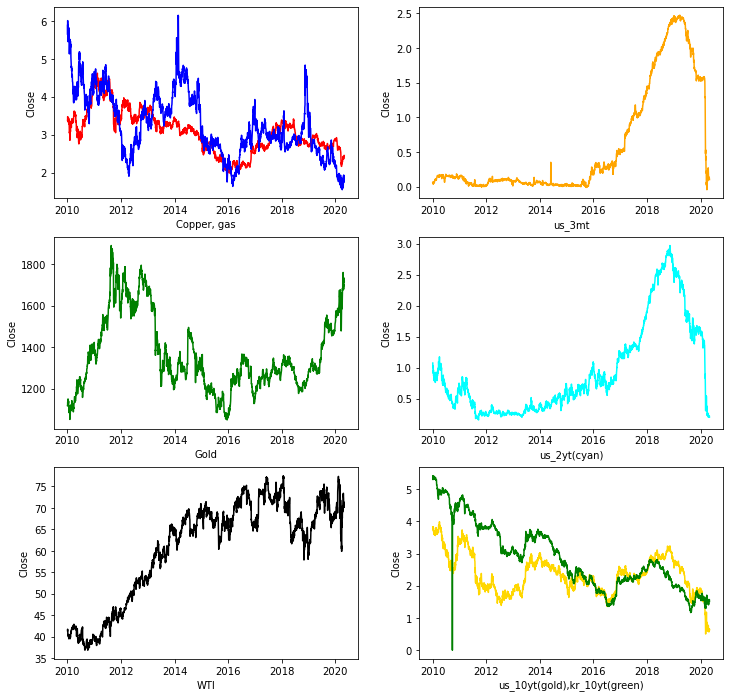

In [10]:
# 원자재 및 국채 금리 시각화
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.lineplot(x=copper_train.index,y = copper_train['Close'], color='r')
sns.lineplot(x=gas_train.index,y = gas_train['Close'], color = 'b')
plt.xlabel('Copper, gas')
plt.subplot(323)
sns.lineplot(x=gold_train.index ,y = gold_train['Close'], color = 'g')
plt.xlabel('Gold')
plt.subplot(325)
sns.lineplot(x=wti_train.index,y = wti_train['Close'], color = 'black')
plt.xlabel('WTI')
plt.subplot(322)
sns.lineplot(x=us_3MT_train.index,y = us_3MT_train['Close'], color = 'orange')
plt.xlabel('us_3mt')
plt.subplot(324)
sns.lineplot(x=us_2YT_train.index,y = us_2YT_train['Close'], color = 'cyan')
plt.xlabel('us_2yt(cyan)')
plt.subplot(326)
sns.lineplot(x=us_10YT_train.index,y = us_10YT_train['Close'], color = 'gold')
sns.lineplot(x=kr_10YT_train.index,y = kr_10YT_train['Close'], color = 'green')
plt.xlabel('us_10yt(gold),kr_10yt(green)')
plt.show()

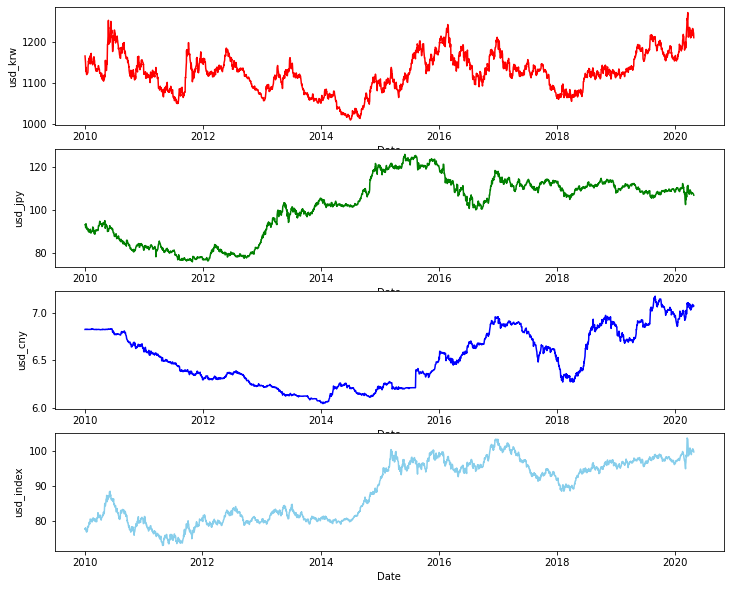

In [11]:
# 환율 (달러-원화/달러-엔화/달러-위안화/달러인덱스) 시각화
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.ylabel('usd_krw')
sns.lineplot(x=usd_krw_train.index,y = usd_krw_train['Close'], color='r')
plt.subplot(412)
plt.ylabel('usd_jpy')
sns.lineplot(x=usd_jpy_train.index,y = usd_jpy_train['Close'], color = 'g')
plt.subplot(413)
plt.ylabel('usd_cny')
sns.lineplot(x=usd_cny_train.index,y = usd_cny_train['Close'], color = 'b')
plt.subplot(414)
plt.ylabel('usd_index')
sns.lineplot(x=usd_index_train.index,y = usd_index_train['Close'], color = 'skyblue')
plt.show()

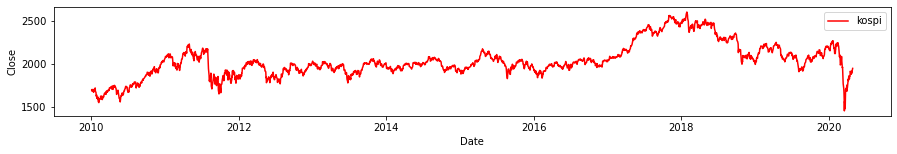

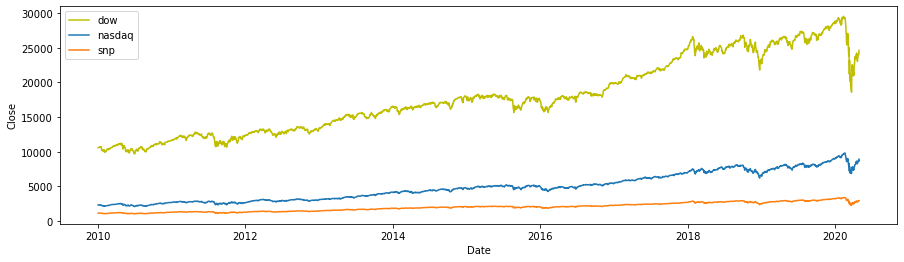

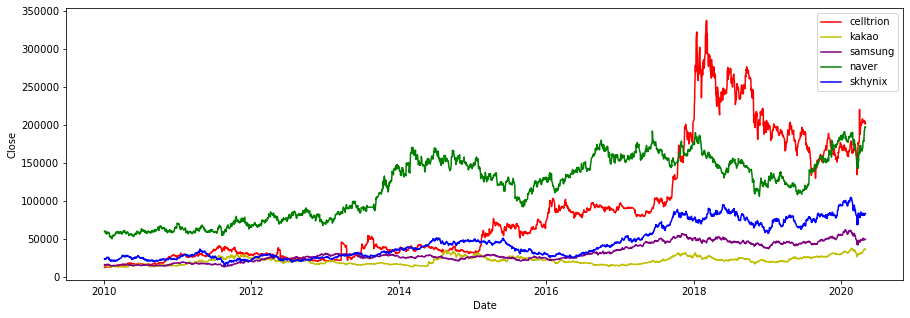

In [12]:
# 국내/해외 지수 및 기업 주가 시각화
plt.figure(figsize=(15,2))
sns.lineplot(x = kospi_train.index, y = kospi_train['Close'], color= 'r', label='kospi')
plt.show()
plt.figure(figsize=(15,4))
sns.lineplot(x = dow_train.index, y = dow_train['Close'], color = 'y',label='dow')
sns.lineplot(x = nasdaq_train.index, y = nasdaq_train['Close'], label='nasdaq')
sns.lineplot(x = snp_train.index, y = snp_train['Close'], label='snp')
plt.show()
plt.figure(figsize=(15,5))
sns.lineplot(x = celltrion_train.index, y = celltrion_train['Close'],color='r', label='celltrion')
sns.lineplot(x = kakao_train.index, y = kakao_train['Close'], color='y', label='kakao')
sns.lineplot(x = samsung_train.index, y = samsung_train['Close'],color='purple', label='samsung')
sns.lineplot(x = naver_train.index, y = naver_train['Close'], color='g', label='naver')
sns.lineplot(x = skhynix_train.index, y = skhynix_train['Close'],color='b', label='skhynix')
plt.show()

In [13]:
# kospi_train merge
kospi_train_merged = pd.merge(kospi_train['Close'],dow_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,snp_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,samsung_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kakao_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,naver_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,skhynix_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,celltrion_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,csi_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,hk_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_krw_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_index_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_cny_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,gold_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,wti_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,copper_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,gas_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kr_10YT_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,us_3MT_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,us_10YT_train.Open,left_index=True,right_index=True,how='left')
kospi_train_merged.columns = ['Target','Dow','Snp','Samsung','Kakao','Naver','Skhynix','Celltrion','Csi','Hk','Usd_krw','Usd_index','Usd_cny','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/252568409.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,naver_train.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/252568409.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,celltrion_train.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/252568409.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,hk_train.Open,left

In [14]:
# merge 확인
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2549 entries, 2010-01-04 to 2020-04-29
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2549 non-null   float64
 1   Dow        2471 non-null   float64
 2   Snp        2471 non-null   float64
 3   Samsung    2548 non-null   float64
 4   Kakao      2548 non-null   float64
 5   Naver      2548 non-null   float64
 6   Skhynix    2548 non-null   float64
 7   Celltrion  2548 non-null   float64
 8   Csi        2427 non-null   float64
 9   Hk         2068 non-null   float64
 10  Usd_krw    2549 non-null   float64
 11  Usd_index  2532 non-null   float64
 12  Usd_cny    2549 non-null   float64
 13  Gold       2420 non-null   float64
 14  Wti        2471 non-null   float64
 15  Copper     2409 non-null   float64
 16  Gas        2469 non-null   float64
 17  Kr_10YT    2548 non-null   float64
 18  Us_3MT     2531 non-null   float64
 19  Us_10YT    2528 non-null   flo

<AxesSubplot:>

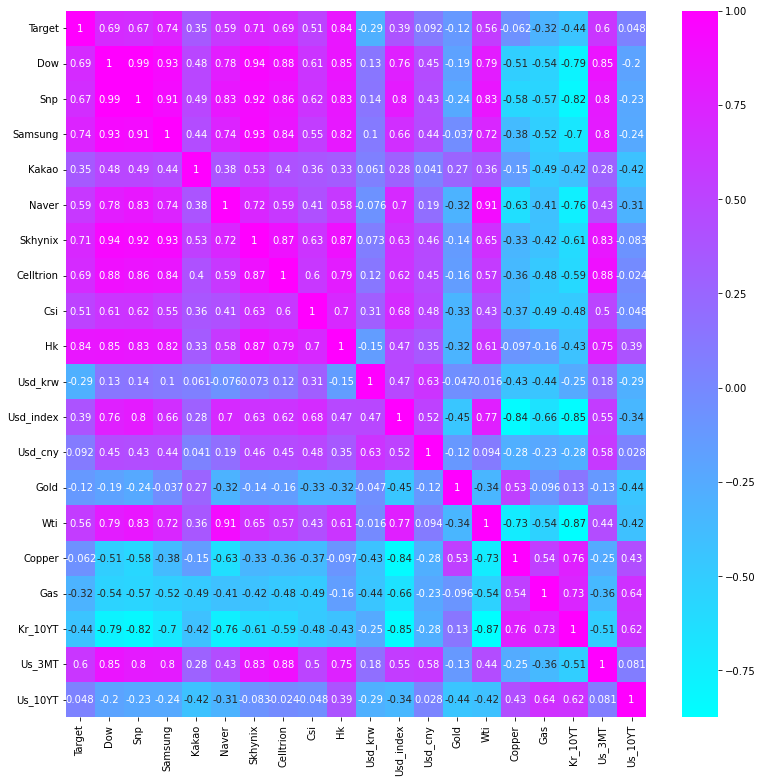

In [16]:
plt.figure(figsize=(13,13))
sns.heatmap(kospi_train_merged.corr(),annot=True, cmap='cool')

In [17]:
# remove null of kospi_train_merged
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Dow'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Usd_index'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Usd_cny'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Gold'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Kr_10YT'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Copper'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Wti'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Gas'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Us_3MT'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Us_10YT'].isnull()].index)
kospi_train_merged = kospi_train_merged.drop(kospi_train_merged[kospi_train_merged['Csi'].isnull()].index)
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2227 entries, 2010-01-04 to 2020-04-29
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2227 non-null   float64
 1   Dow        2227 non-null   float64
 2   Snp        2227 non-null   float64
 3   Samsung    2227 non-null   float64
 4   Kakao      2227 non-null   float64
 5   Naver      2227 non-null   float64
 6   Skhynix    2227 non-null   float64
 7   Celltrion  2227 non-null   float64
 8   Csi        2227 non-null   float64
 9   Hk         1841 non-null   float64
 10  Usd_krw    2227 non-null   float64
 11  Usd_index  2227 non-null   float64
 12  Usd_cny    2227 non-null   float64
 13  Gold       2227 non-null   float64
 14  Wti        2227 non-null   float64
 15  Copper     2227 non-null   float64
 16  Gas        2227 non-null   float64
 17  Kr_10YT    2227 non-null   float64
 18  Us_3MT     2227 non-null   float64
 19  Us_10YT    2227 non-null   flo

In [18]:
# kospi_test merge
kospi_test_merged = pd.merge(kospi_test['Close'],dow_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,snp_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,samsung_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kakao_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,naver_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,skhynix_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,celltrion_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,csi_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,hk_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,usd_krw_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,usd_index_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,usd_cny_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,gold_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,wti_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,copper_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,gas_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kr_10YT_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,us_3MT_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,us_10YT_test.Open,left_index=True,right_index=True,how='left')
kospi_test_merged.columns = ['Target','Dow','Snp','Samsung','Kakao','Naver','Skhynix','Celltrion','Csi','Hk','Usd_krw','Usd_index','Usd_cny','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']
kospi_test_merged.fillna(method='ffill',inplace=True)
kospi_test_merged.fillna(method='bfill',inplace=True)

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/3752808639.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,naver_test.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/3752808639.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,celltrion_test.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_3585/3752808639.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Open_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,hk_test.Open,left_index

In [19]:
# test merge 확인
kospi_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2020-05-04 to 2020-09-29
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     105 non-null    float64
 1   Dow        105 non-null    float64
 2   Snp        105 non-null    float64
 3   Samsung    105 non-null    int64  
 4   Kakao      105 non-null    int64  
 5   Naver      105 non-null    int64  
 6   Skhynix    105 non-null    int64  
 7   Celltrion  105 non-null    int64  
 8   Csi        105 non-null    float64
 9   Hk         105 non-null    float64
 10  Usd_krw    105 non-null    float64
 11  Usd_index  105 non-null    float64
 12  Usd_cny    105 non-null    float64
 13  Gold       105 non-null    float64
 14  Wti        105 non-null    float64
 15  Copper     105 non-null    float64
 16  Gas        105 non-null    float64
 17  Kr_10YT    105 non-null    float64
 18  Us_3MT     105 non-null    float64
 19  Us_10YT    105 non-null    floa

In [44]:
trainX = kospi_train_merged.drop(columns=['Target','Snp','Gold','Gas','Kr_10YT','Us_3MT','Us_10YT','Hk'])
trainy = kospi_train_merged['Target']
testX = kospi_test_merged.drop(columns=['Target','Snp','Gold','Gas','Kr_10YT','Us_3MT','Us_10YT','Hk'])
testy = kospi_test_merged['Target']
print(trainX.shape,trainy.shape,testX.shape,testy.shape)

(2227, 12) (2227,) (105, 12) (105,)


In [45]:
model = LGBMRegressor(max_depth=5,num_leaves=6)
model2 = LinearRegression()
model.fit(trainX,trainy)
model2.fit(trainX,trainy)
pred = model.predict(testX)
pred2 = model2.predict(testX)
print('-----------------------------------------------------------')
print(mean_squared_error(testy,pred))
print(mean_absolute_error(testy,pred))
print(r2_score(testy,pred))
print('-----------------------------------------------------------')
print(mean_squared_error(testy,pred2))
print(mean_absolute_error(testy,pred2))
print(r2_score(testy,pred2))

-----------------------------------------------------------
4644.759342875893
53.4851161468958
0.7976229711547532
-----------------------------------------------------------
77133.41405065462
267.5281693004179
-2.3607836290171362


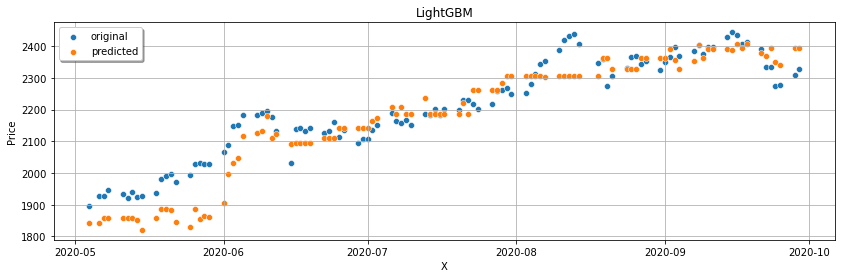

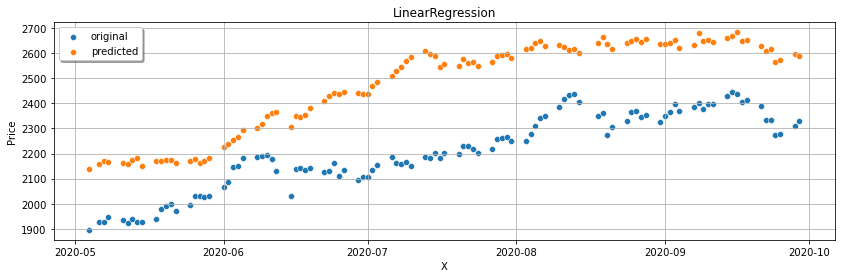

In [46]:
x_ax = testX.index
plt.figure(figsize=(14, 4))
plt.title("LightGBM")
sns.scatterplot(x=x_ax, y=testy, label="original")
sns.scatterplot(x=x_ax, y=pred, label="predicted")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 4))
sns.scatterplot(x=x_ax, y=testy, label="original")
sns.scatterplot(x=x_ax, y=pred2, label="predicted")
plt.title("LinearRegression")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()